This notebook contains code that reads in the csv file generated from the Using_Model notebook file. We then generate the f_score, precision score and recall score of the abstracted and extracted summaries compared to the original synopsis using ROUGE (Recall Oriented Understudy for Gisting Evaluation) metrics. Finally, we generate the same scores to compare the extracted and abstracted summaries in order to evaluate the model. 


In [2]:
# read csv file containing asbstracted and extracted summaries as well as the original synopsis of books and movies into dataframe 
import pandas as pd

filename = 'all_summaries.csv'
df = pd.read_csv(filename)
df

,Synopsis,Extracted Summary,Abstracted Summary
0,fall pieces lara reiss drawn cradle life labyr...,locat cradl life reveal near mount kilimanjaro...,just gun shoot kill wade
1,mexico die anonymity feeling years writer won ...,bierc come mexico die anonymity feel year writ...,bierc come mexico die anonymity feel year wri...
2,tells story psychology grad student named juli...,turn mental ill caus creatur attempt consum,turn mental ill caus creatur attempt consum
3,6teen animated situation comedy children prete...,plot place entir gigant shop mall,plot place entir gigant shop mall
4,agents rocca patrovita flee room rocca cut bar...,kaminski turn shoot baxter selfdefensekaminski...,turn jason accident realiz shoot roof save death
...,...,...,...
1917,regret decision team makes world series kits r...,heat argument dotti kit dotti tell lowenstein ...,heat argument dotti kit dotti tell lowenstein...
1918,1978 kate melendez television news reporter in...,govern claim terrorist claim mere student acti...,set jolli roger posh vacat resort rich famous...
1919,sees bagi running away mother dying claw wound...,mother order contain research leav catgirl sur...,order save bird store follow
1920,tryst local sheriff griff tells stay town refe...,jailed heavi interrog griff convinc town tell ...,jailed heavi interrog griff convinc town tell...


In [3]:
# rename columns in dataframe and drop any 'nan' values 

df.rename(columns={'Extracted Summary':'Extracted','Abstracted Summary':'Abstracted'}, inplace=True)

df=df[df.Abstracted != '']
df=df[df.Extracted != '']
df.dropna(inplace=True)
df

,Synopsis,Extracted,Abstracted
0,fall pieces lara reiss drawn cradle life labyr...,locat cradl life reveal near mount kilimanjaro...,just gun shoot kill wade
1,mexico die anonymity feeling years writer won ...,bierc come mexico die anonymity feel year writ...,bierc come mexico die anonymity feel year wri...
2,tells story psychology grad student named juli...,turn mental ill caus creatur attempt consum,turn mental ill caus creatur attempt consum
3,6teen animated situation comedy children prete...,plot place entir gigant shop mall,plot place entir gigant shop mall
4,agents rocca patrovita flee room rocca cut bar...,kaminski turn shoot baxter selfdefensekaminski...,turn jason accident realiz shoot roof save death
...,...,...,...
1917,regret decision team makes world series kits r...,heat argument dotti kit dotti tell lowenstein ...,heat argument dotti kit dotti tell lowenstein...
1918,1978 kate melendez television news reporter in...,govern claim terrorist claim mere student acti...,set jolli roger posh vacat resort rich famous...
1919,sees bagi running away mother dying claw wound...,mother order contain research leav catgirl sur...,order save bird store follow
1920,tryst local sheriff griff tells stay town refe...,jailed heavi interrog griff convinc town tell ...,jailed heavi interrog griff convinc town tell...


In [5]:
# install the rouge metrics packages using pip 
!pip install rouge 

In [118]:
from rouge import Rouge

# create dictionary with 18 items, each containing a list of scores
# Rouge1, Rouge2, and RougeL are used for both extracted summaries compared to synopsis and abstracted summaries compared to synopsis 
rogue_scores = {'ER1_f':[], 'ER1_p':[], 'ER1_r':[], 'ER2_f':[], 'ER2_p':[], 'ER2_r':[], 'ERL_f':[], 'ERL_p':[], 'ERL_r':[], 'AR1_f':[], 'AR1_p':[], 'AR1_r':[], 'AR2_f':[], 'AR2_p':[], 'AR2_r':[], 'ARL_f':[], 'ARL_p':[], 'ARL_r':[]}

rouge = Rouge()

for index, row in df.iterrows():
    # get f scores, precision scores and recall scores for all the extracted summaries and append to dictionary 
    scores = rouge.get_scores(row['Extracted'], row['Synopsis']) 
    
    rogue_scores['ER1_f'].append(scores[0]['rouge-1']['f'])
    rogue_scores['ER1_p'].append(scores[0]['rouge-1']['p'])
    rogue_scores['ER1_r'].append(scores[0]['rouge-1']['r'])
    
    rogue_scores['ER2_f'].append(scores[0]['rouge-2']['f'])
    rogue_scores['ER2_p'].append(scores[0]['rouge-2']['p'])
    rogue_scores['ER2_r'].append(scores[0]['rouge-2']['r'])
    
    rogue_scores['ERL_f'].append(scores[0]['rouge-l']['f'])
    rogue_scores['ERL_p'].append(scores[0]['rouge-l']['p'])
    rogue_scores['ERL_r'].append(scores[0]['rouge-l']['r'])
    
    # get f scores, precision scores and recall scores for all the abstracted summaries and append to dictionary 
    scores = rouge.get_scores(row['Abstracted'], row['Synopsis'])
    
    rogue_scores['AR1_f'].append(scores[0]['rouge-1']['f'])
    rogue_scores['AR1_p'].append(scores[0]['rouge-1']['p'])
    rogue_scores['AR1_r'].append(scores[0]['rouge-1']['r'])
    
    rogue_scores['AR2_f'].append(scores[0]['rouge-2']['f'])
    rogue_scores['AR2_p'].append(scores[0]['rouge-2']['p'])
    rogue_scores['AR2_r'].append(scores[0]['rouge-2']['r'])
    
    rogue_scores['ARL_f'].append(scores[0]['rouge-l']['f'])
    rogue_scores['ARL_p'].append(scores[0]['rouge-l']['p'])
    rogue_scores['ARL_r'].append(scores[0]['rouge-l']['r'])


In [119]:
#convert scores dictionary to dataframe 
scores_df = pd.DataFrame(rogue_scores)
scores_df

,ER1_f,ER1_p,ER1_r,ER2_f,ER2_p,ER2_r,ERL_f,ERL_p,ERL_r,AR1_f,AR1_p,AR1_r,AR2_f,AR2_p,AR2_r,ARL_f,ARL_p,ARL_r
0,0.086207,0.263158,0.051546,0.014388,0.055556,0.008264,0.053125,0.263158,0.051546,0.058824,0.600000,0.030928,0.000000,0.000,0.00000,0.031006,0.600000,0.030928
1,0.153846,0.562500,0.089109,0.057554,0.250000,0.032520,0.080874,0.500000,0.079208,0.090909,0.555556,0.049505,0.045802,0.375,0.02439,0.049863,0.555556,0.049505
2,0.022989,0.142857,0.012500,0.000000,0.000000,0.000000,0.012587,0.142857,0.012500,0.022989,0.142857,0.012500,0.000000,0.000,0.00000,0.012587,0.142857,0.012500
3,0.068966,0.500000,0.037037,0.000000,0.000000,0.000000,0.024817,0.333333,0.024691,0.068966,0.500000,0.037037,0.000000,0.000,0.00000,0.024817,0.333333,0.024691
4,0.201681,0.666667,0.118812,0.084507,0.333333,0.048387,0.101580,0.555556,0.099010,0.018349,0.125000,0.009901,0.000000,0.000,0.00000,0.009958,0.125000,0.009901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,0.036036,0.250000,0.019417,0.000000,0.000000,0.000000,0.019525,0.250000,0.019417,0.036036,0.250000,0.019417,0.000000,0.000,0.00000,0.019525,0.250000,0.019417
1917,0.162162,0.500000,0.096774,0.047619,0.166667,0.027778,0.099677,0.500000,0.096774,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000
1918,0.033333,0.111111,0.019608,0.000000,0.000000,0.000000,0.020108,0.111111,0.019608,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000
1919,0.104348,0.600000,0.057143,0.000000,0.000000,0.000000,0.048009,0.500000,0.047619,0.087719,0.555556,0.047619,0.000000,0.000,0.00000,0.038351,0.444444,0.038095


In [120]:
# get average of all the scores in each column of the dataframe and out into a new dataframe 

avg_scores_df = scores_df.mean()
avg_scores_df

ER1_f    0.149544
ER1_p    0.510599
ER1_r    0.095971
ER2_f    0.060283
ER2_p    0.219833
ER2_r    0.039159
ERL_f    0.096438
ERL_p    0.485712
ERL_r    0.092287
AR1_f    0.049135
AR1_p    0.288641
AR1_r    0.028108
AR2_f    0.015281
AR2_p    0.108988
AR2_r    0.008808
ARL_f    0.027452
ARL_p    0.275085
ARL_r    0.026934
dtype: float64

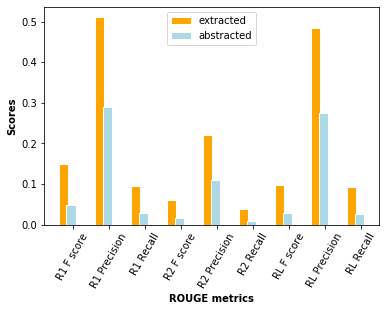

In [121]:
# plot bar graph comparing extracted summary ROGUE scores and abstracted summary scores

import matplotlib.pyplot as plt
import numpy as np

extracted = [avg_scores_df[x] for x in range(0,9)]
abstracted = [avg_scores_df[x] for x in range(9, 18)]

r1 = np.arange(len(extracted))
r2 = [x + barWidth for x in r1]

barWidth = 0.25
plt.bar(r1, extracted, color = 'orange', width=barWidth, edgecolor='white', label='extracted')
plt.bar(r2, abstracted, color = 'lightblue', width=barWidth, edgecolor='white', label='abstracted')

plt.xticks([r + barWidth for r in range(len(extracted))], ['R1 F score', 'R1 Precision', 'R1 Recall','R2 F score', 'R2 Precision', 'R2 Recall', 'RL F score', 'RL Precision', 'RL Recall'], rotation=60)
plt.xlabel('ROUGE metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.legend()




In [122]:

# create dictionary to hold rouge scores for all extracted summaries compared to abstracted summaries 

rogue_model = {'R1_f':[], 'R1_p':[], 'R1_r':[], 'R2_f':[], 'R2_p':[], 'R2_r':[], 'RL_f':[], 'RL_p':[], 'RL_r':[]}

rouge = Rouge()

for index, row in df.iterrows():
    
    scores = rouge.get_scores(row['Abstracted'], row['Extracted']) 
    rogue_model['R1_f'].append(scores[0]['rouge-1']['f'])
    rogue_model['R1_p'].append(scores[0]['rouge-1']['p'])
    rogue_model['R1_r'].append(scores[0]['rouge-1']['r'])
    
    rogue_model['R2_f'].append(scores[0]['rouge-2']['f'])
    rogue_model['R2_p'].append(scores[0]['rouge-2']['p'])
    rogue_model['R2_r'].append(scores[0]['rouge-2']['r'])
    
    rogue_model['RL_f'].append(scores[0]['rouge-l']['f'])
    rogue_model['RL_p'].append(scores[0]['rouge-l']['p'])
    rogue_model['RL_r'].append(scores[0]['rouge-l']['r'])
    
#convert scores dictionary to dataframe

model_score_df = pd.DataFrame(rogue_model)

# get average of all the scores in each column 
avg_model_score_df = model_score_df.mean()
avg_model_score_df

R1_f    0.495048
R1_p    0.544862
R1_r    0.466151
R2_f    0.474370
R2_p    0.520938
R2_r    0.446768
RL_f    0.480896
RL_p    0.544447
RL_r    0.466008
dtype: float64

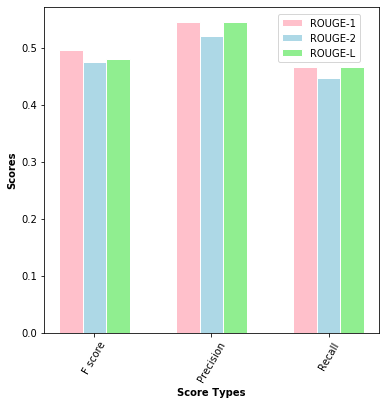

In [125]:
# plot bar graph of scores for abstracted vs extracted summaries

f, ax = plt.subplots(figsize=(6,6))
R1 = [avg_model_score_df[x] for x in range(0,3)]
R2 = [avg_model_score_df[x] for x in range(3, 6)]
RL = [avg_model_score_df[x] for x in range(6, 9)]

r1 = np.arange(len(R1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

barWidth = 0.2
plt.bar(r1, R1, color = 'pink', width=barWidth, edgecolor='white', label='ROUGE-1')
plt.bar(r2, R2, color = 'lightblue', width=barWidth, edgecolor='white', label='ROUGE-2')
plt.bar(r3, RL, color = 'lightgreen', width=barWidth, edgecolor='white', label='ROUGE-L')
plt.xticks([r + barWidth for r in range(len(R1))], ['F score', 'Precision', 'Recall'], rotation=60)
plt.xlabel('Score Types', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.legend(loc=(0.7,0.83))
